In [1]:
%matplotlib inline
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f
from matplotlib.patches import Ellipse

In [2]:
# Load the data
#osx = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA/ISCX_Testing_Osx_trojan.csv')
#rbot = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA/ISCX_Testing_RBot.csv')
#smoke = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA/ISCX_Testing_Smoke_bot.csv')
#sogou = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA/ISCX_Testing_Sogou.csv')
TBot = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA2/ISCX_Testing_TBot.csv')
ZeroAccess = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA2/ISCX_Testing_Zero_access.csv')
Zeus = pd.read_csv('/Users/csstnns/Downloads/CSV/data/PCA2/ISCX_Testing_Zeus.csv')


In [3]:
#data = pd.concat([osx, rbot,smoke,sogou])
data = pd.concat([TBot, ZeroAccess,Zeus])

In [4]:
data.head()

,Source Port,Destination Port,Protocol,Flow Duration,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,...,Bwd IAT Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,BotNet_Label
0,1079,80,6,48383,6799.909059,124.010500,9676.6,12938.362137,28388.0,30.0,...,1853.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBot
1,1079,80,6,216,0.000000,9259.259259,216.0,0.000000,216.0,216.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBot
2,1086,80,6,1545875,140.373575,3.881297,309175.0,622399.136503,1418365.0,24.0,...,2188.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBot
3,1086,80,6,132,0.000000,15151.515152,132.0,0.000000,132.0,132.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBot
4,2066,80,6,28808,11420.438767,208.275479,5761.6,7536.133312,14028.0,26.0,...,781.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,TBot


In [5]:
data.shape

(3061, 27)

In [6]:
data = pd.get_dummies(data, columns=['Source Port', 'Destination Port','Protocol'],prefix=['sp', 'dp','proto'])

In [7]:
X = data.drop('BotNet_Label', 1)

X_std = StandardScaler().fit_transform(X)



In [8]:
labels = data['BotNet_Label']
names = labels.unique()

In [9]:
target = pd.get_dummies(pd.DataFrame(data['BotNet_Label']),prefix='Bot')
#names = target.unique()

In [10]:
target.head()

,Bot_TBot,Bot_Zero access,Bot_Zeus
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [11]:
from sklearn.cross_decomposition import PLSRegression
pls2 = PLSRegression(n_components=2)
pls2.fit(X_std, target)

#

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [12]:
X_, Y_ = pls2.transform(X_std, target)

In [13]:
X_

array([[-0.89656593,  1.30424363],
       [-0.93420808,  1.3018498 ],
       [-0.90089821,  1.27379041],
       ..., 
       [ 0.32946392,  3.7587399 ],
       [-0.54296113,  3.05203891],
       [-0.61853804,  1.86909097]])

In [14]:
# the predicted class is that with the highest predicted membership.
Y_pred = pls2.predict(X_std)

In [15]:
Y_pred

array([[ 0.29859728,  0.38837896,  0.31302376],
       [ 0.30535343,  0.38122579,  0.31342078],
       [ 0.30255112,  0.38832088,  0.309128  ],
       ..., 
       [-0.17158956,  0.56110274,  0.61048683],
       [ 0.05353868,  0.41182764,  0.53463368],
       [ 0.19110541,  0.42733877,  0.38155581]])

In [16]:
#data = data.drop(['Flow Bytes/s','Flow Packets/s','FlowBytesPerSec','FlowPacketsPerSec'], 1)

In [17]:
#data.dtypes

In [18]:
#any(isinstance(x,str) for x in data['Flow Bytes/s'].values)
#ss = [s for s in data['Flow Bytes/s'].values if  (isinstance(s,str))]

In [19]:
#data['FlowBytesPerSec'] = [float(x) for x in data['Flow Bytes/s'].values if  (isinstance(x,str)) else x]

In [20]:
#data.fillna(lambda x: median(x), inplace=True)

In [21]:
#f = lambda x: x.max() - x.min()

In [22]:

#X.apply(f)

In [23]:
#X['Flow Bytes/s'].dtype 

In [24]:
#names

In [25]:
#np.log(X['Idle Max'])

In [26]:
#X.isnull().any()

In [27]:
import numpy as np
#'Normal', 'Neris', 'TBot', 'RBot', 'Menti
#Osx_trojan = np.where(target == 'Osx_trojan')
#Smoke_bot = np.where(target == 'Smoke bot')
#Sogou = np.where(target == 'Sogou')
#RBot = np.where(target == 'RBot')


TBot = np.where(labels == 'TBot')
Zero_access = np.where(labels == 'Zero access')
Zeus = np.where(labels == 'Zeus')


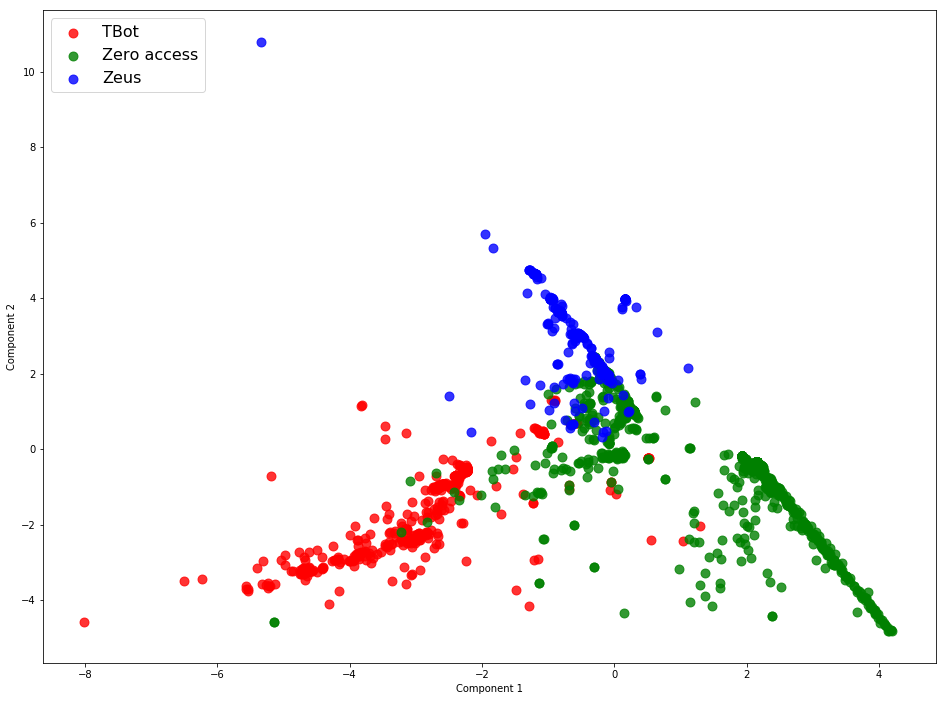

In [28]:

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)

for indices,lab, col in zip((TBot,Zero_access,Zeus),names,('r','g','b')):
    ax.scatter(X_[indices, 0], X_[indices, 1],label=lab,c=col,alpha=0.8,s=80)

# To Calculate critical value for Hotelling's T2
#ns, _ = Y_pca.shape
#components = [0,1]
#Fval = f.ppf(0.95, 2, ns-2) 
#a = np.sqrt(np.var(Y_pca[:, 0])*Fval*2*((ns-1)/(ns-2)))
#b = np.sqrt(np.var(Y_pca[:, 1])*Fval*2*((ns-1)/(ns-2)))
#ellipse = Ellipse(xy=(0, 0), width=a*2, height=b*2, edgecolor=col, fc='None', lw=2)
#ax.add_patch(ellipse)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.legend(loc='upper left',prop={'size':16}) #plot.legend(loc=2,prop={'size':6})

plt.show()